In [2]:
% matplotlib inline
from pymongo import MongoClient
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import networkx as nx

In [3]:
mongo_username = 'Campione'
mongo_password = 'veTRxJL29lpKWwPn'
mongo_url = 'mongodb://%s:%s@cluster0-shard-00-01-i6gcp.mongodb.net:27017/admin' % (
            mongo_username, mongo_password)
client = MongoClient(mongo_url,ssl=True,replicaSet='Cluster0-shard-0',authSource='admin')
info = client.server_info()  # Forces a call.
print(info)
print(client.database_names())

{'version': '3.4.14', 'gitVersion': 'fd954412dfc10e4d1e3e2dd4fac040f8b476b268', 'modules': ['enterprise'], 'allocator': 'tcmalloc', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [3, 4, 14, 0], 'openssl': {'running': 'OpenSSL 1.0.1e-fips 11 Feb 2013', 'compiled': 'OpenSSL 1.0.1e-fips 11 Feb 2013'}, 'buildEnvironment': {'distmod': 'rhel70', 'distarch': 'x86_64', 'cc': '/opt/mongodbtoolchain/v2/bin/gcc: gcc (GCC) 5.4.0', 'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -fno-builtin-memcmp', 'cxx': '/opt/mongodbtoolchain/v2/bin/g++: g++ (GCC) 5.4.0', 'cxxflags': '-Woverloaded-virtual -Wno-maybe-uninitialized -std=c++11', 'linkflags': '-pthread -Wl,-z,now -rdynamic -Wl,--fatal-warnings -fstack-protector-strong -fuse-ld=gold -Wl,-

In [4]:
db = client.gitdbPro

In [5]:
repos = db.repos

In [6]:
descriptions = repos.distinct('description')

In [7]:
df = pd.DataFrame(descriptions)

In [8]:
df

,0
0,How to be low-level programmer
1,Import OpenStreetMap data into Unreal Engine 4
2,react-native template to target multiple platf...
3,Connect your App to Multiple Messaging Channel...
4,Proto Actor - Ultra fast distributed actors fo...
5,用rxjava简单封装了指纹识别，并实现对生命周期的自动绑定，顺便撸了一个指纹控件
6,pagehelper-spring-boot
7,📅 A date picker components for ionic2 ／ionic3
8,Track prices on Amazon and receive email alert...
9,Advanced web based trading client for the Stel...


In [9]:
len_df = {}
index = 0
for item in df[0]:
    temp_str = str(item)
    temp_list = temp_str.strip().split(" ")
    len_df[index]=len(temp_list)
    index += 1
print (len_df)

{0: 5, 1: 7, 2: 12, 3: 12, 4: 12, 5: 1, 6: 1, 7: 8, 8: 11, 9: 10, 10: 4, 11: 10, 12: 8, 13: 5, 14: 10, 15: 4, 16: 16, 17: 25, 18: 6, 19: 11, 20: 6, 21: 11, 22: 3, 23: 1, 24: 8, 25: 42, 26: 14, 27: 6, 28: 8, 29: 3, 30: 8, 31: 10, 32: 12, 33: 21, 34: 1, 35: 21, 36: 5, 37: 6, 38: 8, 39: 9, 40: 7, 41: 6, 42: 4, 43: 6, 44: 24, 45: 7, 46: 9, 47: 8, 48: 11, 49: 6, 50: 33, 51: 1, 52: 6, 53: 8, 54: 5, 55: 6, 56: 5, 57: 7, 58: 1, 59: 5, 60: 8, 61: 12, 62: 2, 63: 8, 64: 5, 65: 8, 66: 11, 67: 12, 68: 10, 69: 4, 70: 4, 71: 11, 72: 4, 73: 22, 74: 6, 75: 10, 76: 39, 77: 10, 78: 13, 79: 11, 80: 8, 81: 9, 82: 7, 83: 1, 84: 8, 85: 10, 86: 4, 87: 3, 88: 18, 89: 20, 90: 14, 91: 10, 92: 8, 93: 21, 94: 6, 95: 2, 96: 16, 97: 13, 98: 11, 99: 10, 100: 12, 101: 14, 102: 13, 103: 8, 104: 16, 105: 9, 106: 13, 107: 2, 108: 8, 109: 3, 110: 11, 111: 6, 112: 10, 113: 4, 114: 5, 115: 9, 116: 11, 117: 2, 118: 9, 119: 5, 120: 20, 121: 12, 122: 7, 123: 6, 124: 12, 125: 3, 126: 8, 127: 12, 128: 4, 129: 9, 130: 3, 131: 7, 

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
temp_list=[]
for item in len_df.keys():
    temp_list.append(len_df[item])
temp_list_c = Counter(temp_list)
print (temp_list_c)

Counter({7: 1068, 6: 1065, 8: 1037, 1: 1005, 9: 923, 5: 918, 4: 807, 10: 745, 3: 619, 11: 605, 12: 518, 2: 420, 13: 408, 14: 330, 15: 268, 16: 193, 17: 148, 18: 112, 19: 99, 20: 77, 21: 73, 22: 62, 24: 40, 23: 37, 27: 26, 26: 26, 25: 23, 30: 23, 28: 21, 29: 20, 33: 16, 32: 14, 31: 14, 35: 10, 36: 8, 34: 6, 42: 5, 37: 5, 46: 5, 43: 4, 38: 4, 41: 4, 39: 3, 54: 3, 45: 3, 40: 3, 48: 3, 59: 2, 44: 2, 52: 2, 47: 2, 56: 2, 63: 2, 79: 1, 55: 1, 51: 1, 1306: 1, 69: 1, 61: 1, 72: 1, 57: 1, 78: 1, 67: 1, 70: 1, 49: 1, 64: 1})


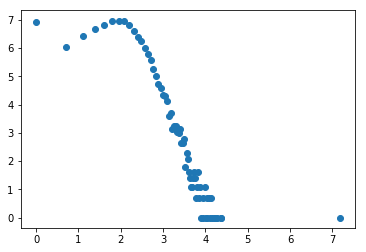

In [12]:
x1=[]
y1=[]
for item in temp_list_c.keys():
    x1.append(np.log(int(item)))
    y1.append(np.log(int(temp_list_c[item])))
x=np.asarray(x1)
y=np.asarray(y1)
plt.scatter(x,y)

#plt.show()


In [13]:
#ax.set_xscale('log')
#ax.set_yscale('log')
#Y, X = np.histogram(len_df.values(),  normed=True)

#X = [x*np.sqrt(bins[1]) for x in X][:-1]  # find the center point for each bin. can you explain this?

#plt.ylim((0.00001, 1))
#plt.xlabel('Number of deaths, x')
#plt.ylabel("n(X)")
#plt.loglog(X,Y, 'o', markersize=3, markerfacecolor='none')

In [14]:
import nltk

token_list = []
for item in df[0]:
    temp_str = str(item)
    df_tokens = nltk.word_tokenize(temp_str)
    for i in df_tokens:
        token_list.append(i)
token_list

['How',
 'to',
 'be',
 'low-level',
 'programmer',
 'Import',
 'OpenStreetMap',
 'data',
 'into',
 'Unreal',
 'Engine',
 '4',
 'react-native',
 'template',
 'to',
 'target',
 'multiple',
 'platforms',
 ':',
 'globe_with_meridians',
 ':',
 ':',
 'iphone',
 ':',
 ':',
 'computer',
 ':',
 'with',
 'single',
 'codebase',
 '.',
 'Connect',
 'your',
 'App',
 'to',
 'Multiple',
 'Messaging',
 'Channels',
 'with',
 'the',
 'W3C',
 'Open',
 'standard',
 '.',
 'Proto',
 'Actor',
 '-',
 'Ultra',
 'fast',
 'distributed',
 'actors',
 'for',
 'Go',
 ',',
 'C',
 '#',
 'and',
 'Java/Kotlin',
 '用rxjava简单封装了指纹识别，并实现对生命周期的自动绑定，顺便撸了一个指纹控件',
 'pagehelper-spring-boot',
 '📅',
 'A',
 'date',
 'picker',
 'components',
 'for',
 'ionic2',
 '／ionic3',
 'Track',
 'prices',
 'on',
 'Amazon',
 'and',
 'receive',
 'email',
 'alerts',
 'for',
 'price',
 'drops',
 'Advanced',
 'web',
 'based',
 'trading',
 'client',
 'for',
 'the',
 'Stellar',
 'network',
 '.',
 '📈📊💹💱',
 'Join',
 'our',
 'slack',
 'channel',
 'An',
 'E

In [15]:
token_list_c = Counter(token_list)
token_list_c

Counter({'How': 29,
         'to': 1835,
         'be': 112,
         'low-level': 5,
         'programmer': 2,
         'Import': 2,
         'OpenStreetMap': 1,
         'data': 229,
         'into': 117,
         'Unreal': 4,
         'Engine': 22,
         '4': 41,
         'react-native': 22,
         'template': 69,
         'target': 11,
         'multiple': 52,
         'platforms': 18,
         ':': 1664,
         'globe_with_meridians': 1,
         'iphone': 6,
         'computer': 20,
         'with': 1156,
         'single': 42,
         'codebase': 6,
         '.': 3641,
         'Connect': 10,
         'your': 546,
         'App': 92,
         'Multiple': 7,
         'Messaging': 5,
         'Channels': 1,
         'the': 1501,
         'W3C': 2,
         'Open': 84,
         'standard': 30,
         'Proto': 1,
         'Actor': 4,
         '-': 362,
         'Ultra': 2,
         'fast': 111,
         'distributed': 41,
         'actors': 1,
         'for': 3604,
       

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Wenxuan
[nltk_data]     Han\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
print (sorted(token_list_c.items(), key=lambda d: d[1],reverse=True))

[(',', 6874), ('.', 3641), ('for', 3604), ('and', 2655), ('A', 2002), ('to', 1835), ('of', 1698), (':', 1664), ('the', 1501), ('a', 1453), ('in', 1352), ('with', 1156), (')', 1019), ('(', 1004), ('on', 882), ('is', 724), ('library', 553), ('your', 546), ('that', 539), ('Android', 457), ('using', 420), ('by', 412), ('React', 398), ('iOS', 378), ('from', 369), ('-', 362), ('An', 341), ('code', 341), ('The', 339), ('simple', 334), ('based', 324), ('+', 320), ('&', 316), ('!', 301), ('tool', 298), ('an', 292), ('you', 284), ("'s", 283), ('implementation', 278), ('framework', 275), ('app', 266), ('Python', 254), ('API', 249), ("''", 235), ('data', 229), ('Go', 219), ('Swift', 219), ('web', 213), ('Learning', 208), ('list', 208), ('``', 208), ('This', 194), ('as', 192), ('learning', 191), ('or', 187), ('use', 184), ('project', 182), ('https', 181), ('written', 162), ('can', 157), ('/', 155), ('Deep', 152), ('source', 151), ('application', 148), ('JavaScript', 144), ('component', 141), ('Nati

In [18]:
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [19]:
detect('Hello')

'fi'

In [20]:
detect('你好')

'zh-cn'

In [21]:
detect('good morning')

'hr'

In [ ]:
lang_df= []
index= 0
for item in df[0]:
    try:
        d = detect(str(item))
        lang_df.append(d)
    except:
        index +=1
        
print (lang_df)


In [25]:
lang_df_c = Counter(lang_df)
print (lang_df_c)

Counter({'en': 9411, 'zh-cn': 697, 'no': 218, 'ko': 166, 'vi': 154, 'fr': 142, 'ca': 128, 'de': 109, 'it': 106, 'ro': 88, 'da': 85, 'af': 62, 'et': 56, 'nl': 55, 'pt': 49, 'es': 41, 'tl': 33, 'pl': 31, 'cy': 28, 'sv': 23, 'sl': 19, 'fi': 18, 'id': 18, 'so': 16, 'tr': 15, 'ru': 15, 'sw': 13, 'lt': 8, 'hr': 8, 'ja': 6, 'cs': 6, 'sk': 5, 'sq': 4, 'zh-tw': 2, 'th': 2, 'hu': 2, 'lv': 1})


In [22]:
df[0:432]

,0
0,How to be low-level programmer
1,Import OpenStreetMap data into Unreal Engine 4
2,react-native template to target multiple platf...
3,Connect your App to Multiple Messaging Channel...
4,Proto Actor - Ultra fast distributed actors fo...
5,用rxjava简单封装了指纹识别，并实现对生命周期的自动绑定，顺便撸了一个指纹控件
6,pagehelper-spring-boot
7,📅 A date picker components for ionic2 ／ionic3
8,Track prices on Amazon and receive email alert...
9,Advanced web based trading client for the Stel...


In [23]:
detect_langs('手机影音')

[zh-cn:0.9999961775575311]

In [36]:
from nltk.tokenize import RegexpTokenizer  
from stop_words import get_stop_words  
from nltk.stem.porter import PorterStemmer  
from gensim import corpora, models  
import gensim  
  
tokenizer = RegexpTokenizer(r'\w+')  
  
# create English stop words list  
en_stop = get_stop_words('en')  
  
# Create p_stemmer of class PorterStemmer  
p_stemmer = PorterStemmer()  
      
# create sample documents  
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."  
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."  
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."  
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."  
doc_e = "Health professionals say that brocolli is good for your health."   
  
# compile sample documents into a list  
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]
  
# list for tokenized documents in loop  
texts = []  
  
# loop through document list  
for i in doc_set:  
      
    # clean and tokenize document string  
    raw = i.lower()  
    tokens = tokenizer.tokenize(raw)  
  
    # remove stop words from tokens  
    stopped_tokens = [i for i in tokens if not i in en_stop]  
      
    # stem tokens  
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]  
      
    # add tokens to list  
    texts.append(stemmed_tokens)  
  
# turn our tokenized documents into a id <-> term dictionary  
dictionary = corpora.Dictionary(texts)  
      
# convert tokenized documents into a document-term matrix  
corpus = [dictionary.doc2bow(text) for text in texts]  
  
# generate LDA model  
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [37]:
print(ldamodel.print_topics(num_topics=5, num_words=5))

[(0, '0.081*"health" + 0.059*"drive" + 0.059*"pressur" + 0.035*"blood" + 0.035*"expert"'), (1, '0.087*"brocolli" + 0.087*"good" + 0.072*"brother" + 0.072*"mother" + 0.070*"eat"')]


In [38]:
des_list = []
for item in df[0]:
    des_list.append(item)
    
print (des_list)

['How to be low-level programmer', 'Import OpenStreetMap data into Unreal Engine 4', 'react-native template to target multiple platforms :globe_with_meridians: :iphone: :computer: with single codebase.', 'Connect your App to Multiple Messaging Channels with the W3C Open standard.', 'Proto Actor - Ultra fast distributed actors for Go, C# and Java/Kotlin', '用rxjava简单封装了指纹识别，并实现对生命周期的自动绑定，顺便撸了一个指纹控件', 'pagehelper-spring-boot', '📅 A date picker components for ionic2 ／ionic3', 'Track prices on Amazon and receive email alerts for price drops', 'Advanced web based trading client for the Stellar network. 📈📊💹💱', 'Join our slack channel', 'An Elm-based prototype to help designers build accessible color palettes.', 'Can neural networks transliterate Romaji into Japanese correctly? ', 'A repo with small projects', 'Go - CQRS / Event Sourcing made easy - Go', 'RNN Tutorial for Artists', 'A macOS app to convert JSON objects into Swift structs (currently targets Swift 4 and Codable)', 'Keras Implemen

In [39]:
# list for tokenized documents in loop  
texts = []    

# loop through document list  
for i in des_list:  
    # clean and tokenize document string
    try:
        raw=i.lower()
        tokens = tokenizer.tokenize(raw)
    except:
        error='NoneType object has no attribute lower'
        print(error)
  
    # remove stop words from tokens  
    stopped_tokens = [i for i in tokens if not i in en_stop]  
    print (stopped_tokens)  
    # stem tokens  
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]  
    #print (stemmed_tokens)
    # add tokens to list  
    texts.append(stemmed_tokens) 

# turn our tokenized documents into a id <-> term dictionary  
dictionary = corpora.Dictionary(texts)  
      
# convert tokenized documents into a document-term matrix  
corpus = [dictionary.doc2bow(text) for text in texts]
  
# generate LDA model  
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

['low', 'level', 'programmer']
['import', 'openstreetmap', 'data', 'unreal', 'engine', '4']
['react', 'native', 'template', 'target', 'multiple', 'platforms', 'globe_with_meridians', 'iphone', 'computer', 'single', 'codebase']
['connect', 'app', 'multiple', 'messaging', 'channels', 'w3c', 'open', 'standard']
['proto', 'actor', 'ultra', 'fast', 'distributed', 'actors', 'go', 'c', 'java', 'kotlin']
['用rxjava简单封装了指纹识别', '并实现对生命周期的自动绑定', '顺便撸了一个指纹控件']
['pagehelper', 'spring', 'boot']
['date', 'picker', 'components', 'ionic2', 'ionic3']
['track', 'prices', 'amazon', 'receive', 'email', 'alerts', 'price', 'drops']
['advanced', 'web', 'based', 'trading', 'client', 'stellar', 'network']
['join', 'slack', 'channel']
['elm', 'based', 'prototype', 'help', 'designers', 'build', 'accessible', 'color', 'palettes']
['can', 'neural', 'networks', 'transliterate', 'romaji', 'japanese', 'correctly']
['repo', 'small', 'projects']
['go', 'cqrs', 'event', 'sourcing', 'made', 'easy', 'go']
['rnn', 'tutorial'

['implementation', 'classification', 'framework', 'paper', 'aggregated', 'residual', 'transformations', 'deep', 'neural', 'networks']
['example', 'tensorflow', 'codes', 'caicloud', 'tensorflow', 'service', 'dev', 'environment']
['collection', 'utilities', 'creating', 'testing', 'experimenting', 'service', 'workers']
['awesome', 'iterm2', 'backend', 'matplotlib', 'can', 'plot', 'directly', 'terminal']
['hardentools', 'utility', 'disables', 'number', 'risky', 'windows', 'features']
['baidu', 'map', 'components', 'vue', '2', 'x']
['大鸡排的博客归档']
['literate', 'code', 'examples', 'common', 'ui', 'patterns']
['kallax', 'postgresql', 'typesafe', 'orm', 'go', 'language']
['another', 'approach', 'create', 'navigationdrawer', 'material', 'concepts']
['cli', 'tool', 'bridges', 'react', 'native', 'modules', 'ui', 'components', 'ease']
['pinview', 'library', 'android', 'sparkles']
['gradle', 'tab', 'completion', 'bash', 'zsh']
['vue', 'js', 'component', 'create', 'dynamic', 'tables']
['photoshop', 'sk

['supporting', 'public', 'code', 'sigbovik17', 'submission']
['sbt', 'plugin', 'show', 'summary', 'compilation', 'messages']
['stuff', 'security', 'might', 'good', 'know']
['android修改状态栏颜色']
['erlang', 'orleans']
['simpleratingbar', 'allows', 'us', 'create', 'ratingbar', 'margin', 'items']
['react', 'boilerplate', 'used', 'best', 'practices', 'focus', 'performance']
['phishing', 'dropper', 'designed', 'pentest']
['computer', 'official', 'devtranslate', 'website']
['protocol', 'analyzer', 'like', 'wireshark', 'cui', 'tui']
['tiny', 'message', 'bus']
['command', 'line', 'tool', 'helping', 'fetch', 'wwdc', 'infos']
['link', 'useful', 'websites', 'programmers']
['security', 'tips', 'startups']
['autonomous', 'self', 'hosted', 'bittorrent', 'dht', 'search', 'engine', 'suite']
['make', 'ascii', 'art', 'deep', 'learning']
['vue2', '0', 'elementui', '后台管理平台', 'https', 'suweiteng', 'github', 'io', 'vue2', 'management', 'platform']
['ಠ_ಠ', 'vim', 'plugin', 'disapprove', 'deeply', 'indented', 'co

['create', 'next', 'js', 'apps', 'one', 'command']
['安卓攻城狮必备神器']
['set', 'themes', 'thunderbird', 'inspired', 'monterail', 'blog', 'post']
['image', 'deblurring', 'using', 'generative', 'adversarial', 'networks']
['speaker', '基于vue2', '0的实时聊天项目']
['wide', 'range', 'mass', 'audit', 'toolkit']
['拓展性极高类似微信图片浏览', '常见应用场景如微信朋友圈照片九宫格和微信聊天图片预览']
['siteserver', 'cms', '是', 'net平台cms系统的创始者', '能够以最低的成本', '最少的人力投入在最短的时间内架设一个功能齐全', '性能优异', '规模庞大并易于维护的网站平台']
['simple', 'flask', 'example', 'quick', 'prototypes', 'small', 'applications']
['deterministically', 'build', 'docker', 'images', 'git', 'repository', 'commit']
['animations', 'strong', 'heart', 'stupid', 'mind']
['highly', 'customizable', 'qr', 'code', 'scanning', 'component', 'react', 'native']
['caches', 'result', 'following', 'loaders', 'disk']
['terminal', 'inside', 'sublime', 'text', '3', 'view']
['can', 'get', 'quantum', 'machine', 'learning', 'basics', 'algorithms', 'study', 'materials', 'projects', 'descriptions', 'projects', 'around',

['easy', 'setup', 'ocaml', 'reason', 'native', 'projects']
['ui', 'component', 'framework', 'building', 'lcui', 'application']
['little', 'toy']
['react', 'native', 'nfc', 'module', 'android', 'ios']
['coolest', 'gradient', 'hues', 'swatches', 'uvdesk']
['用', 'vue', 'js', '开发的跨三端应用', 'use', 'vue', 'js', 'develop', 'cross', 'platform', 'full', 'stack', 'application']
['程序员应该访问的最佳网站中文版']
['simple', 'cryptocurrency', 'implementation', 'written', 'illustrate', 'basic', 'components', 'proof', 'work', 'based', 'public', 'distributed', 'ledger']
['hyperloglog', 'lots', 'sugar', 'sparse', 'loglog', 'beta', 'bias', 'correction', 'tailcut', 'space', 'reduction']
['blog', 'system', 'based', 'nuxt', 'js', 'cn']
['code', 'model', 'agnostic', 'meta', 'learning', 'fast', 'adaptation', 'deep', 'networks']
['dotmesh', 'dm', 'like', 'git', 'data', 'volumes', 'databases', 'files', 'etc', 'docker', 'kubernetes']
['mp3', 'decoder', 'pure', 'go']
['ida', 'python', 'embedded', 'toolkit', 'idapython', 'script

['api', 'blueprint', 'renderer', 'laravel', 'customizable', 'via', 'blade', 'templates']
['istio', 'workshop']
['perfect', 'textinput', 'scrollview']
['jekyll', 'template', 'inspired', 'netflix']
['draw', 'chart', 'progress', 'bar', 'style']
['windows', 'kernel', 'exploitation', 'static', 'dynamic', 'analysis', 'exploits', 'vuln', 'research', 'mitigations', 'bypass', 's', 'genric', 'bug', 'class', 's']
['evasi0n6', 'jailbreak', 'evad3rs', 'ios', '6', '0', '6', '1', '2']
['open', 'source', 'templating', 'deployment', 'tool', 'hashicorp', 'nomad', 'jobs']
['一款模仿易企秀制作的编辑器']
['path', 'finding', 'graph']
['lulu', 'free', 'open', 'source', 'macos', 'firewall', 'aims', 'block', 'unauthorized', 'outgoing', 'network', 'traffic']
['package', 'optimize', 'site', 'automatically', 'results', '35', 'optimization']
['collect', 'runtime', 'type', 'information', 'javascript', 'code']
['implementation', 'video', 'frame', 'interpolation', 'via', 'adaptive', 'separable', 'convolution', 'using', 'pytorch']

['open', 'source', 'neural', 'machine', 'translation', 'tensorflow']
['procedural', 'retro', '3d', 'game', 'github', 'gameoff', '2017']
['interactive', 'graphql', 'exploration', 'tool', 'built', 'react', 'still', 'working', 'website']
['spring', 'cloud', '脚手架', '上手即用', '集成swagger', '对外rest接口', '集成主流互联网saas架构', '包含es', 'hbase', 'kafka', 'redis', 'mongo等']
['firmware', 'esp8266', 'based', 'itead', 'sonoff', 'switches', 'use', 'homeassistant', 'mqtt']
['goroutine', 'leak', 'detector']
['一个仿京东商城的个人练手项目']
['automatically', 'create', 'polls', 'github', 'issues']
['latex2e', 'kernel']
['domain', 'specific', 'language', 'state', 'machines']
['基于yykit实现微信朋友圈的展示']
['udacity作业', '健康记录']
['ukkonen', 's', 'approximate', 'string', 'matching', 'algorithm']
['hands', 'labs', 'serverless', 'openfaas', 'python']
['onnx', 'model', 'format', 'support', 'apache', 'mxnet']
['large_orange_diamond', 'fantastic', 'mobile', 'ui', 'lib', 'implement', 'vue']
['lightweight', 'plug', 'play', 'indefinite', 'pager', 

['sysmon', 'tools', 'powershell']
['mobilink', 'smart', 'contract']
['eslint', 'plugin', 'rules', 'use', 'codebox']
['simple', 'essence', 'automatic', 'differentiation']
['quickly', 'integrate', 'pretty', 'checkbox', 'components', 'vue', 'js']
['curated', 'list', 'awesome', 'shiny', 'apps', 'statistics', 'asas']
['neat', 'little', 'mac', 'program', 'answering', 'hq', 'trivia', 'questions']
['lollipop', 'web', 'platform', 'designed', 'mysql', 'inception']
['cnn', 'rnn', 'attention', 'text', 'classification', 'tensorflow']
['sharedpreferences', 'wrapper', 'truly', 'supported', 'sharing', 'data', 'across', 'multi', 'process']
['block', 'explorer', 'local', 'ethereum', 'testnets']
['rogue', 'toolkit', 'extensible', 'toolkit', 'aimed', 'providing', 'penetration', 'testers', 'easy', 'use', 'platform', 'deploy', 'access', 'points', 'purpose', 'conducting', 'penetration', 'testing', 'red', 'team', 'engagements']
['kotlin', 'example', 'livedata', 'data', 'binding', 'usage']
['header', 'c', '14'

['chrome', 'extension', 'express', 'server', 'exploits', 'keylogging', 'abilities', 'css']
['mirror', 'versioned', 'go', 'prototype']
['configurable', 'automation', 'access', 'window', 'information', 'can', 'anything', 'anywhere']
['react', 'store', 'built', 'top', 'new', 'context', 'api']
['tiny', '135b', 'utility', 'safely', 'writing', 'deep', 'object', 'values']
['labnotebook', 'tool', 'allows', 'flexibly', 'monitor', 'record', 'save', 'query', 'machine', 'learning', 'experiments']
['vue', 'tour', 'lightweight', 'simple', 'customizable', 'guided', 'tour', 'plugin', 'use', 'vue', 'js', 'provides', 'quick', 'easy', 'way', 'guide', 'users', 'application']
['curated', 'list', 'stuff', 'related', 'new', 'react', 'context', 'api']
['rails', 'logs', 'analyzer', 'see', 'fast', 'views', 'rendering']
['demo', 'vue', 'js', 'app', 'mixes', 'clientside', 'templates', 'serverside', 'templates', 'leading', 'xss', 'vulnerability']
['css', 'selector', 'generator']
['kit', 'essential', 'cross', 'plat

['fire', 'idiomatic', 'golang', 'restful', 'starter', 'kit']
['tiny', 'library', '200b', 'gzip', 'deferring', 'something', 'tick']
['storytime', 'framework', 'parse', 'render', 'interface', 'builder', 'storyboard', 'files', 'mit', 'licensed']
['python', 'package', 'multi', 'process', 'running']
['gems', 'unity', 'labs', 'user', 'base']
['voxel', 'engine', 'c', 'using', 'urho3d']
['simple', 'parsing', 'tool', 'get', 'data', 'facebook', 'export']
['一个城市选择组件']
['汉化下llvm的文档']
['super', 'simple', 'vue', 'samples']
['leetcode', 'playing']
['photofall']
['library', 'uses', 'hardware', 'acceleration', 'load', 'sequences', 'video', 'frames', 'facilitate', 'machine', 'learning', 'training']
['zero', 'boilerplate', 'commandline', 'argument', 'parsing', 'rust']
['onedrive', 'directory', 'index']
['collection', 'aggregates', 'basic', 'modules', 'project', 'saving', 'developer', 'time']
['check', 'vpn', 'leaks', 'ip', 'address', 'via', 'webrtc', 'technology']
['bring', 'react', 'native', 'js', 'code

In [40]:
print(ldamodel.print_topics(num_topics=5, num_words=5))

[(0, '0.012*"http" + 0.009*"io" + 0.009*"swift" + 0.008*"c" + 0.006*"com"'), (1, '0.012*"use" + 0.009*"librari" + 0.008*"react" + 0.007*"android" + 0.007*"code"')]


In [34]:
print (texts)

[['low', 'level', 'programm'], ['import', 'openstreetmap', 'data', 'unreal', 'engin', '4'], ['react', 'nativ', 'templat', 'target', 'multipl', 'platform', 'globe_with_meridian', 'iphon', 'comput', 'singl', 'codebas'], ['connect', 'app', 'multipl', 'messag', 'channel', 'w3c', 'open', 'standard'], ['proto', 'actor', 'ultra', 'fast', 'distribut', 'actor', 'go', 'c', 'java', 'kotlin'], ['用rxjava简单封装了指纹识别', '并实现对生命周期的自动绑定', '顺便撸了一个指纹控件'], ['pagehelp', 'spring', 'boot'], ['date', 'picker', 'compon', 'ionic2', 'ionic3'], ['track', 'price', 'amazon', 'receiv', 'email', 'alert', 'price', 'drop'], ['advanc', 'web', 'base', 'trade', 'client', 'stellar', 'network'], ['join', 'slack', 'channel'], ['elm', 'base', 'prototyp', 'help', 'design', 'build', 'access', 'color', 'palett'], ['can', 'neural', 'network', 'transliter', 'romaji', 'japanes', 'correctli'], ['repo', 'small', 'project'], ['go', 'cqr', 'event', 'sourc', 'made', 'easi', 'go'], ['rnn', 'tutori', 'artist'], ['maco', 'app', 'convert', 'js